In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from geopy.distance import geodesic



In [195]:
# load the datasets
ais_train = pd.read_csv('ais_train.csv', sep='|')
ais_test = pd.read_csv('ais_test.csv', sep='|')
ports = pd.read_csv('ports.csv', sep='|')
schedules = pd.read_csv('schedules_to_may_2024.csv', sep='|')
vessels = pd.read_csv('vessels.csv', sep='|')

In [196]:
# display first few rows of ais_train dataset
print("AIS Train Dataset Overview:")
print(ais_train.head())

AIS Train Dataset Overview:
                  time    cog   sog  rot  heading  navstat       etaRaw  \
0  2024-01-01 00:00:25  284.0   0.7    0       88        0  01-09 23:00   
1  2024-01-01 00:00:36  109.6   0.0   -6      347        1  12-29 20:00   
2  2024-01-01 00:01:45  111.0  11.0    0      112        0  01-02 09:00   
3  2024-01-01 00:03:11   96.4   0.0    0      142        1  12-31 20:00   
4  2024-01-01 00:03:51  214.0  19.7    0      215        0  01-25 12:00   

   latitude  longitude                  vesselId                    portId  
0 -34.74370  -57.85130  61e9f3a8b937134a3c4bfdf7  61d371c43aeaecc07011a37f  
1   8.89440  -79.47939  61e9f3d4b937134a3c4bff1f  634c4de270937fc01c3a7689  
2  39.19065  -76.47567  61e9f436b937134a3c4c0131  61d3847bb7b7526e1adf3d19  
3 -34.41189  151.02067  61e9f3b4b937134a3c4bfe77  61d36f770a1807568ff9a126  
4  35.88379   -5.91636  61e9f41bb937134a3c4c0087  634c4de270937fc01c3a74f3  


In [197]:
# Check for missing values
print("\nMissing Values in AIS Train Dataset:")
print(ais_train.isnull().sum())



Missing Values in AIS Train Dataset:
time            0
cog             0
sog             0
rot             0
heading         0
navstat         0
etaRaw          0
latitude        0
longitude       0
vesselId        0
portId       1615
dtype: int64


Data Cleaning: Handling missing values

In [198]:

# fill missing values in ais_train dataset
ais_train['portId'].fillna("unknown", inplace=True)

C:\Users\lucia\AppData\Local\Temp\ipykernel_3448\1101953415.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ais_train['portId'].fillna("unknown", inplace=True)


In [199]:
ais_train

,time,cog,sog,rot,heading,navstat,etaRaw,latitude,longitude,vesselId,portId
0,2024-01-01 00:00:25,284.0,0.7,0,88,0,01-09 23:00,-34.74370,-57.85130,61e9f3a8b937134a3c4bfdf7,61d371c43aeaecc07011a37f
1,2024-01-01 00:00:36,109.6,0.0,-6,347,1,12-29 20:00,8.89440,-79.47939,61e9f3d4b937134a3c4bff1f,634c4de270937fc01c3a7689
2,2024-01-01 00:01:45,111.0,11.0,0,112,0,01-02 09:00,39.19065,-76.47567,61e9f436b937134a3c4c0131,61d3847bb7b7526e1adf3d19
3,2024-01-01 00:03:11,96.4,0.0,0,142,1,12-31 20:00,-34.41189,151.02067,61e9f3b4b937134a3c4bfe77,61d36f770a1807568ff9a126
4,2024-01-01 00:03:51,214.0,19.7,0,215,0,01-25 12:00,35.88379,-5.91636,61e9f41bb937134a3c4c0087,634c4de270937fc01c3a74f3
...,...,...,...,...,...,...,...,...,...,...,...
1522060,2024-05-07 23:59:07,359.1,13.4,0,1,0,05-08 05:00,52.19131,-5.82223,clh6aqawa0002gh0zypfa5dut,634c4de270937fc01c3a7417
1522061,2024-05-07 23:59:08,12.3,17.1,0,13,0,05-10 03:00,38.96142,-12.00502,61e9f3aeb937134a3c4bfe43,634c4de270937fc01c3a76a1
1522062,2024-05-07 23:59:08,269.8,14.9,-1,270,0,05-15 23:00,49.71372,-5.22042,61e9f43db937134a3c4c0169,634c4de270937fc01c3a787b
1522063,2024-05-07 23:59:08,8.0,18.7,0,6,0,05-08 12:45,38.27895,10.78280,61e9f469b937134a3c4c029b,61d3781293c6feb83e5eb73b


In [200]:
# parse datetime columns for easier handling
ais_train['time'] = pd.to_datetime(ais_train['time'], errors='coerce')


Feature Engineering

In [201]:
# derive new features such as day of the week, hour of the day from the timestamp
ais_train['day_of_week'] = ais_train['time'].dt.dayofweek
ais_train['hour_of_day'] = ais_train['time'].dt.hour


Exploratory Data Analysis (EDA)

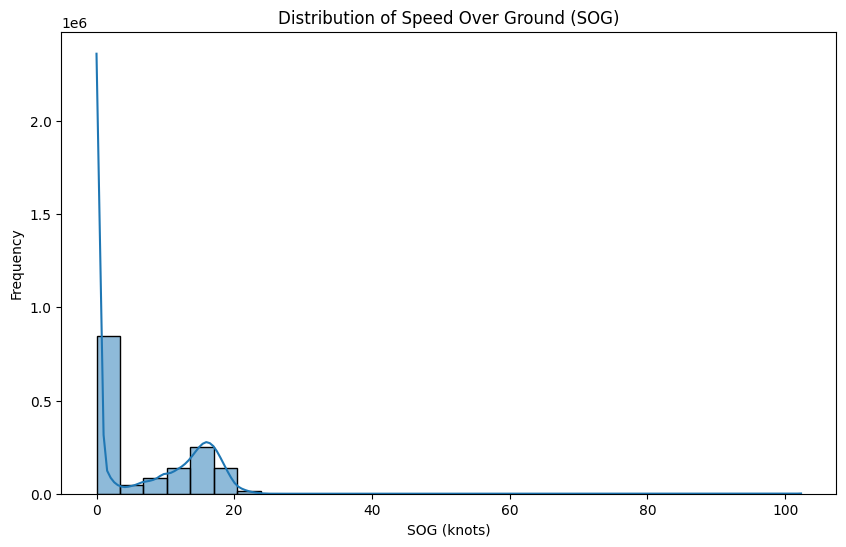

In [202]:
# plot the distribution of SOG (Speed Over Ground)
plt.figure(figsize=(10, 6))
sns.histplot(ais_train['sog'], bins=30, kde=True)
plt.title('Distribution of Speed Over Ground (SOG)')
plt.xlabel('SOG (knots)')
plt.ylabel('Frequency')
plt.show()


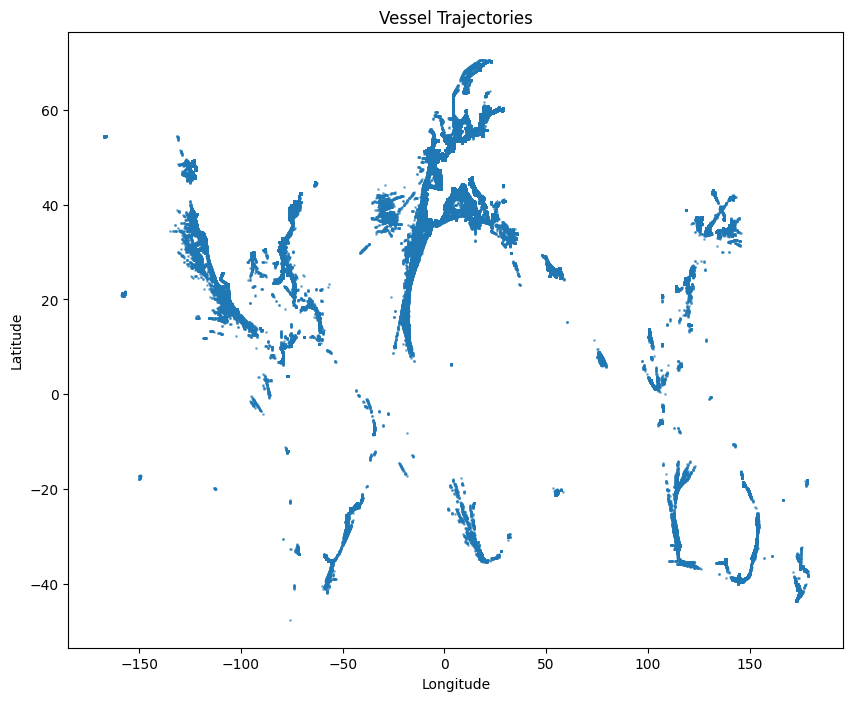

In [203]:

# plot vessel trajectories
plt.figure(figsize=(10, 8))
plt.scatter(ais_train['longitude'], ais_train['latitude'], alpha=0.5, s=1)
plt.title('Vessel Trajectories')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [204]:
# define a function to detect outliers using the Interquartile Range (IQR) method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    

In [205]:
# detect outliers in Speed Over Ground (SOG)
sog_outliers = detect_outliers_iqr(ais_train, 'sog')
print(f"Number of SOG outliers detected: {len(sog_outliers)}")


Number of SOG outliers detected: 417


In [206]:

# handling ROT (Rate of Turn)
# values of ROT between -126 and +126 are valid; cap extreme values to this range
ais_train['rot'] = np.clip(ais_train['rot'], -126, 126)


In [207]:

# handling NAVSTAT (Navigational Status)
# remove any entries with invalid NAVSTAT codes
valid_navstat_codes = list(range(0, 15))  
ais_train = ais_train[ais_train['navstat'].isin(valid_navstat_codes)]


In [208]:
# detecting outliers in COG
# valid range for COG is 0 to 359 degrees
invalid_cog = ais_train[(ais_train['cog'] < 0) | (ais_train['cog'] > 359)]
print(f"Number of invalid COG values detected: {len(invalid_cog)}")


Number of invalid COG values detected: 10858


In [209]:
# handling COG outliers
# cap COG values within the range 0 to 359
ais_train['cog'] = np.clip(ais_train['cog'], 0, 359)


C:\Users\lucia\AppData\Local\Temp\ipykernel_3448\2074430566.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ais_train['cog'] = np.clip(ais_train['cog'], 0, 359)


In [210]:
# summary after outlier treatment for COG
print("\nSummary after Outlier Treatment for COG:")
print(ais_train['cog'].describe())


Summary after Outlier Treatment for COG:
count    1.521395e+06
mean     1.782427e+02
std      1.076759e+02
min      0.000000e+00
25%      7.810000e+01
50%      1.838000e+02
75%      2.690000e+02
max      3.590000e+02
Name: cog, dtype: float64


In [211]:

# summary after outlier treatment
print("\nSummary after Outlier Treatment:")
print(ais_train.describe())


Summary after Outlier Treatment:


                                time           cog           sog  \
count                        1521395  1.521395e+06  1.521395e+06   
mean   2024-03-06 03:41:21.000296448  1.782427e+02  6.334214e+00   
min              2024-01-01 00:00:25  0.000000e+00  0.000000e+00   
25%       2024-02-03 03:53:40.500000  7.810000e+01  0.000000e+00   
50%              2024-03-07 13:13:47  1.838000e+02  5.000000e-01   
75%              2024-04-07 07:57:59  2.690000e+02  1.410000e+01   
max              2024-05-07 23:59:08  3.590000e+02  1.023000e+02   
std                              NaN  1.076759e+02  7.539847e+00   

                rot       heading       navstat      latitude     longitude  \
count  1.521395e+06  1.521395e+06  1.521395e+06  1.521395e+06  1.521395e+06   
mean   4.977583e-01  1.762266e+02  2.086920e+00  3.658465e+01  1.149435e+01   
min   -1.260000e+02  0.000000e+00  0.000000e+00 -4.753287e+01 -1.675409e+02   
25%    0.000000e+00  7.500000e+01  0.000000e+00  3.451430e+01 -5.219975

In [212]:

# Lag Features: create lagged variables for latitude, longitude, SOG, COG
# this will help the model understand the recent movement patterns of each vessel
ais_train = ais_train.sort_values(by=['vesselId', 'time'])
lag_features = ['latitude', 'longitude', 'sog', 'cog']
for feature in lag_features:
    for lag in range(1, 4):  # using a 3-step lag
        ais_train[f'{feature}_lag_{lag}'] = ais_train.groupby('vesselId')[feature].shift(lag)

# Rolling Statistics: create rolling averages to smooth out random fluctuations
for feature in lag_features:
    ais_train[f'{feature}_rolling_mean'] = ais_train.groupby('vesselId')[feature].rolling(window=3).mean().reset_index(level=0, drop=True)


In [213]:
# calculate distance travelled between consecutive points

def calculate_distance(row):
    if pd.notnull(row['latitude_lag_1']) and pd.notnull(row['longitude_lag_1']):
        start = (row['latitude_lag_1'], row['longitude_lag_1'])
        end = (row['latitude'], row['longitude'])
        return geodesic(start, end).km
    else:
        return np.nan

ais_train['distance_travelled'] = ais_train.apply(calculate_distance, axis=1)


In [214]:
# velocity and bearing change
# calculate change in speed (delta SOG) and change in course (delta COG)
ais_train['delta_sog'] = ais_train.groupby('vesselId')['sog'].diff()
ais_train['delta_cog'] = ais_train.groupby('vesselId')['cog'].diff()


In [215]:
# Temporal Features: encode time of the day and day of the week as cyclic features
# this helps the model understand periodic patterns (e.g., vessels tend to travel more during certain hours)
ais_train['hour_sin'] = np.sin(2 * np.pi * ais_train['hour_of_day'] / 24)
ais_train['hour_cos'] = np.cos(2 * np.pi * ais_train['hour_of_day'] / 24)
ais_train['day_sin'] = np.sin(2 * np.pi * ais_train['day_of_week'] / 7)
ais_train['day_cos'] = np.cos(2 * np.pi * ais_train['day_of_week'] / 7)

Lag Features: creation of lag features (LATITUDE, LONGITUDE, SOG, COG) for the past 3 steps. This helps the model understand the recent movement history of each vessel.

Rolling Statistics: rolling means for each vessel's movement to smooth out fluctuations. This helps capture a more generalized trend.

Distance Travelled: distance between consecutive coordinates (LATITUDE, LONGITUDE) is calculated using the geodesic function from geopy. This feature can be useful for understanding vessel velocity over a sequence of time.

Change in Speed and Course: delta_SOG and delta_COG capture changes in speed and direction, respectively. Abrupt changes might indicate maneuvers or congested conditions.

Temporal Features:to represent the cyclical nature of time, sine and cosine transformations were used on hour_of_day and day_of_week. This allows the model to better understand temporal cycles.


In [216]:


# Vessel-Specific Features: join vessel information to the AIS dataset
ais_train = ais_train.merge(vessels, how='left', left_on='vesselId', right_on='vesselId')
# select and drop irrelevant columns



In [217]:

# merge with Ports dataset
ais_train = ais_train.merge(ports, how='left', left_on='portId', right_on='portId')

ais_train = ais_train.rename(columns={'longitude_x': 'longitude', 'latitude_x': 'latitude', 'longitude_y': 'port_longitude', 'latitude_y': 'port_latitude'})

# drop redundant columns after merging
ais_train.drop(columns=['name', 'portLocation', 'UN_LOCODE', 'ISO'], inplace=True)

def distance_to_port(row):
    if pd.notnull(row['latitude']) and pd.notnull(row['port_latitude']) and pd.notnull(row['longitude']) and pd.notnull(row['port_longitude']):
        vessel_position = (row['latitude'], row['longitude'])
        port_position = (row['port_latitude'], row['port_longitude'])
        return geodesic(vessel_position, port_position).km
    else:
        return np.nan

ais_train['distance_to_port'] = ais_train.apply(distance_to_port, axis=1)

In [218]:

# more analysis of missing values
print("Missing values in each column of the AIS Train dataset:")
print(ais_train.isnull().sum())

Missing values in each column of the AIS Train dataset:
time                            0
cog                             0
sog                             0
rot                             0
heading                         0
navstat                         0
etaRaw                          0
latitude                        0
longitude                       0
vesselId                        0
portId                          0
day_of_week                     0
hour_of_day                     0
latitude_lag_1                688
latitude_lag_2               1375
latitude_lag_3               2062
longitude_lag_1               688
longitude_lag_2              1375
longitude_lag_3              2062
sog_lag_1                     688
sog_lag_2                    1375
sog_lag_3                    2062
cog_lag_1                     688
cog_lag_2                    1375
cog_lag_3                    2062
latitude_rolling_mean        1375
longitude_rolling_mean       1375
sog_rolling_mean          

In [219]:

# analysis of which columns have many missing values
total_rows = len(ais_train)
missing_percentage = ais_train.isnull().sum() / total_rows * 100
print("\nPercentage of missing values in each column:")
print(missing_percentage)

# drop columns with more than 50% missing values
drop_cols = missing_percentage[missing_percentage > 50].index
print(f"\nColumns dropped due to having more than 50% missing values: {list(drop_cols)}")
ais_train.drop(columns=drop_cols, inplace=True)



# # impute missing values in numerical columns using the mean or interpolation
# num_cols = ais_train.select_dtypes(include=['float64', 'int64']).columns
# ais_train[num_cols] = ais_train[num_cols].apply(lambda x: x.fillna(x.mean()))



Percentage of missing values in each column:
time                       0.000000
cog                        0.000000
sog                        0.000000
rot                        0.000000
heading                    0.000000
navstat                    0.000000
etaRaw                     0.000000
latitude                   0.000000
longitude                  0.000000
vesselId                   0.000000
portId                     0.000000
day_of_week                0.000000
hour_of_day                0.000000
latitude_lag_1             0.045222
latitude_lag_2             0.090378
latitude_lag_3             0.135534
longitude_lag_1            0.045222
longitude_lag_2            0.090378
longitude_lag_3            0.135534
sog_lag_1                  0.045222
sog_lag_2                  0.090378
sog_lag_3                  0.135534
cog_lag_1                  0.045222
cog_lag_2                  0.090378
cog_lag_3                  0.135534
latitude_rolling_mean      0.090378
longitude_rolling_

In [220]:
# convert NAVSTAT into dummy variables
print("\nCategorical variables to convert:")
print(ais_train['navstat'].value_counts())

# convert 'navstat' into dummy variables
ais_train = pd.get_dummies(ais_train, columns=['navstat'], prefix='navstat', prefix_sep='_', drop_first=False)



Categorical variables to convert:
navstat
0     782099
5     605831
1     129515
2       2081
8        948
6        521
4        232
3        161
11         2
13         1
14         1
7          1
12         1
9          1
Name: count, dtype: int64


In [221]:
ais_train.columns

Index(['time', 'cog', 'sog', 'rot', 'heading', 'etaRaw', 'latitude',
       'longitude', 'vesselId', 'portId', 'day_of_week', 'hour_of_day',
       'latitude_lag_1', 'latitude_lag_2', 'latitude_lag_3', 'longitude_lag_1',
       'longitude_lag_2', 'longitude_lag_3', 'sog_lag_1', 'sog_lag_2',
       'sog_lag_3', 'cog_lag_1', 'cog_lag_2', 'cog_lag_3',
       'latitude_rolling_mean', 'longitude_rolling_mean', 'sog_rolling_mean',
       'cog_rolling_mean', 'distance_travelled', 'delta_sog', 'delta_cog',
       'hour_sin', 'hour_cos', 'day_sin', 'day_cos', 'shippingLineId', 'CEU',
       'DWT', 'GT', 'vesselType', 'breadth', 'enginePower', 'homePort',
       'length', 'yearBuilt', 'port_longitude', 'port_latitude', 'countryName',
       'distance_to_port', 'navstat_0', 'navstat_1', 'navstat_2', 'navstat_3',
       'navstat_4', 'navstat_5', 'navstat_6', 'navstat_7', 'navstat_8',
       'navstat_9', 'navstat_11', 'navstat_12', 'navstat_13', 'navstat_14'],
      dtype='object')

In [222]:
# create a new feature "vessel_status" based on NAVSTAT codes
# group NAVSTAT into "moving" and "stationary" based on categories

unknown_code = [2, 3, 4, 9, 11, 12, 13, 14]  # other codes with less defined status, but without 10 and 15 that does not appear in the dataset
moving_codes = ['navstat_0', 'navstat_8']  # dummy variables indicating the vessel is moving
stationary_codes = ['navstat_1', 'navstat_5', 'navstat_6', 'navstat_7']  # dummy variables indicating the vessel is stationary
unknown_codes = ['navstat_' + str(code) for code in unknown_code]


# create the 'vessel_status' feature
ais_train['vessel_status'] = ais_train[moving_codes].max(axis=1).apply(lambda x: 'moving' if x == 1 else None)
ais_train['vessel_status'] = ais_train.apply(lambda row: 'stationary' if row[stationary_codes].max() == 1 else row['vessel_status'], axis=1)
ais_train['vessel_status'] = ais_train.apply(lambda row: 'unknown' if row[unknown_codes].max() == 1 else row['vessel_status'], axis=1)

# show the first few rows to review changes
print("\nAIS Train dataset after optimizations:")
print(ais_train.head())





AIS Train dataset after optimizations:
                 time    cog   sog  rot  heading       etaRaw  latitude  \
0 2024-01-12 14:07:47  308.1  17.1   -6      316  01-08 06:00   7.50361   
1 2024-01-12 14:31:00  307.6  17.3    5      313  01-14 23:30   7.57302   
2 2024-01-12 14:57:23  306.8  16.9    5      312  01-14 23:30   7.65043   
3 2024-01-12 15:18:48  307.9  16.9    6      313  01-14 23:30   7.71275   
4 2024-01-12 15:39:47  307.0  16.3    7      313  01-14 23:30   7.77191   

   longitude                  vesselId                    portId  ...  \
0   77.58340  61e9f38eb937134a3c4bfd8b  61d376b393c6feb83e5eb50c  ...   
1   77.49505  61e9f38eb937134a3c4bfd8b  61d376d893c6feb83e5eb546  ...   
2   77.39404  61e9f38eb937134a3c4bfd8b  61d376d893c6feb83e5eb546  ...   
3   77.31394  61e9f38eb937134a3c4bfd8b  61d376d893c6feb83e5eb546  ...   
4   77.23585  61e9f38eb937134a3c4bfd8b  61d376d893c6feb83e5eb546  ...   

   navstat_5  navstat_6  navstat_7  navstat_8  navstat_9  navstat_11  

In [223]:
# save cleaned data for further processing
ais_train.to_csv('ais_train_cleaned.csv', index=False)